Muhammad Talha

MS-AI

Enrollment: 24I-7621

Adv AI Assignment-01 (Searches)

Maze Generation

In [130]:
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

def generate_maze(size):
    maze = np.zeros((size, size), dtype=int)
    obstacle_count = int(size * size * 0.3)

    while obstacle_count > 0:
        x, y = np.random.randint(0, size), np.random.randint(0, size)
        if maze[x][y] == 0:
            maze[x][y] = 1
            obstacle_count -= 1

    #start and goal positions
    start = (np.random.randint(0, size), np.random.randint(0, size))
    goal = (np.random.randint(0, size), np.random.randint(0, size))

    maze[start[0], start[1]] = 0
    maze[goal[0], goal[1]] = 0

  #start and goal are apart
    while np.abs(start[0] - goal[0]) + np.abs(start[1] - goal[1]) < 15:
        goal = (np.random.randint(0, size), np.random.randint(0, size))

    return maze, start, goal

Addition of obstacle

In [131]:
#Add a New Obstacle after 10 Moves
def add_obstacle(maze):
    empty_cells = [(i, j) for i in range(maze.shape[0]) for j in range(maze.shape[1]) if maze[i][j] == 0]
    if empty_cells:
        x, y = random.choice(empty_cells)
        maze[x][y] = 1



movement of obstacle

In [132]:
#move obstacle after 15 Moves
def move_obstacle(maze):
    obstacles = [(i, j) for i in range(maze.shape[0]) for j in range(maze.shape[1]) if maze[i][j] == 1]
    if obstacles:
        x, y = random.choice(obstacles)
        # possible direction(up, down, left, right)
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        random.shuffle(directions)
        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            if (0 <= new_x < maze.shape[0]) and (0 <= new_y < maze.shape[1]) and maze[new_x][new_y] == 0:
                maze[x][y] = 0
                maze[new_x][new_y] = 1
                break

BFS

In [133]:
def bfs(maze, start, goal):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    queue = deque([start])
    visited = set([start])
    parent = {start: None}
    move_count = 0

    while queue:
        current = queue.popleft()
        move_count += 1

        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1]


        if move_count % 10 == 0:
            add_obstacle(maze)

        if move_count % 15 == 0:
            move_obstacle(maze)

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            #Conditions for neighbor, if pass all check it will be enque and will be mark visited
            if (0 <= neighbor[0] < maze.shape[0] and #to check that neighbor lies within the boundary of maze
                0 <= neighbor[1] < maze.shape[1] and
                maze[neighbor[0], neighbor[1]] == 0 and #neighbor is not an obstacle
                neighbor not in visited):

                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current

    return []

DFS

In [134]:
def dfs(maze, start, goal):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    stack = [start]
    visited = set([start])
    parent = {start: None}
    move_count = 0

    while stack:
        current = stack.pop()
        move_count += 1


        if current == goal:
            path = []
            while current is not None: #Back to start from goal node and start node has no parent none
                path.append(current)
                current = parent[current]
            return path[::-1]
#add new obstacle after 10 moves
        if move_count % 10 == 0:
            add_obstacle(maze)

        if move_count % 15 == 0:
            move_obstacle(maze)

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if (0 <= neighbor[0] < maze.shape[0] and
                0 <= neighbor[1] < maze.shape[1] and
                maze[neighbor[0], neighbor[1]] == 0 and
                neighbor not in visited):

                stack.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current

    return []

UCS (Uniform cost)

In [135]:
import heapq
def ucs(maze, start, goal):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    # Priority queue to explore nodes by cost
    pq = []
    heapq.heappush(pq, (0, start))  # (cost, node)
    visited = set([start])
    parent = {start: None}
    move_count = 0

    while pq:
        current_cost, current = heapq.heappop(pq)
        move_count += 1

        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1]


        if move_count % 10 == 0:
            add_obstacle(maze)
        if move_count % 15 == 0:
            move_obstacle(maze)


        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if (0 <= neighbor[0] < maze.shape[0] and
                0 <= neighbor[1] < maze.shape[1] and
                maze[neighbor[0], neighbor[1]] == 0 and
                neighbor not in visited):

                # Cost per move is always 1 in UCS, so total cost is current_cost + 1
                total_cost = current_cost + 1
                heapq.heappush(pq, (total_cost, neighbor))
                visited.add(neighbor)
                parent[neighbor] = current

    return []


DLS

In [136]:
def dls(maze, start, goal, depth_limit):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    stack = [(start, 0)]  # Stack to store (node, current_depth)
    visited = set([start])
    parent = {start: None}
    move_count = 0

    while stack:
        current, depth = stack.pop()
        move_count += 1

        # If goal is reached, reconstruct the path
        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1]

        # Check if the depth limit is reached, if so, backtrack
        if depth >= depth_limit:
            continue  # Backtrack and explore another path


        if move_count % 10 == 0:
            add_obstacle(maze)
        if move_count % 15 == 0:
            move_obstacle(maze)


        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if (0 <= neighbor[0] < maze.shape[0] and
                0 <= neighbor[1] < maze.shape[1] and
                maze[neighbor[0], neighbor[1]] == 0 and
                neighbor not in visited):

                stack.append((neighbor, depth + 1))  # Increase depth
                visited.add(neighbor)
                parent[neighbor] = current

    return []

IDS (IDS is same as DLS so here we will call the existing DLS)

In [137]:
def ids(maze, start, goal, max_depth):
    # Incrementally increase depth limit from 0 to max_depth
    for depth_limit in range(max_depth + 1):
        print(f"Trying depth limit {depth_limit}...")
        path = dls(maze, start, goal, depth_limit)  # Call the existing DLS function
        if path:
            return path

    return []

Greedy best first search(GBFS)

In [138]:
import heapq

# Heuristic function to calculate Manhattan distance between two points
def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def gbfs(maze, start, goal):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    pq = []  # Priority queue to explore nodes based on heuristic value
    heapq.heappush(pq, (manhattan_distance(start, goal), start))  # (heuristic, node)
    visited = set([start])
    parent = {start: None}
    move_count = 0

    while pq:
        current_priority, current = heapq.heappop(pq)
        move_count += 1

        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1]

        if move_count % 10 == 0:
            add_obstacle(maze)
        if move_count % 15 == 0:
            move_obstacle(maze)

            for direction in directions:
              neighbor = (current[0] + direction[0], current[1] + direction[1])
            if (0 <= neighbor[0] < maze.shape[0] and
                0 <= neighbor[1] < maze.shape[1] and
                maze[neighbor[0], neighbor[1]] == 0 and
                neighbor not in visited):

                # Calculate Manhattan distance (heuristic)
                heuristic = manhattan_distance(neighbor, goal)
                heapq.heappush(pq, (heuristic, neighbor))
                visited.add(neighbor)
                parent[neighbor] = current

    return []


A*

In [139]:
import heapq

# Heuristic function: Manhattan distance
def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(maze, start, goal):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    pq = []  # Priority queue (min-heap)

    # Each element in the priority queue is a tuple: (total_cost, g(n), node)
    heapq.heappush(pq, (manhattan_distance(start, goal), 0, start))  # (f(n), g(n), node)

    visited = set()
    parent = {start: None}
    g_score = {start: 0}  # g(n) is the cost to reach each node from the start
    move_count = 0

    while pq:
        _, current_g, current = heapq.heappop(pq)
        move_count += 1

        if current == goal:
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            return path[::-1]

        # Mark node as visited
        visited.add(current)


        if move_count % 10 == 0:
            add_obstacle(maze)
        if move_count % 15 == 0:
            move_obstacle(maze)

        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            if (0 <= neighbor[0] < maze.shape[0] and
                0 <= neighbor[1] < maze.shape[1] and
                maze[neighbor[0], neighbor[1]] == 0):

                # Calculate g(n) for the neighbor (cost to reach this neighbor)
                tentative_g_score = current_g + 1  # Cost is uniform, so add 1

                # If neighbor has not been visited or find  a lower cost path to neighbor
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    parent[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    # Calculate f(n) = g(n) + h(n)
                    f_score = tentative_g_score + manhattan_distance(neighbor, goal)
                    heapq.heappush(pq, (f_score, tentative_g_score, neighbor))

    return []


Visulization

In [140]:

def visualize_maze_with_path(maze, start, goal, path, title):
    size = maze.shape[0]
    colored_maze = np.copy(maze)
    colored_maze[start] = 2
    colored_maze[goal] = 3

    # Mark the path in the maze (use value 4 for the path cells)
    for step in path:
        if step != start and step != goal:
            colored_maze[step] = 4

    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'green', 'red', 'blue'])
    plt.imshow(colored_maze, cmap=cmap)

    plt.grid(True, color='gray')
    plt.xticks(np.arange(-.5, size, 1), [])
    plt.yticks(np.arange(-.5, size, 1), [])
    plt.gca().set_xticks(np.arange(-.5, size, 1), minor=True)
    plt.gca().set_yticks(np.arange(-.5, size, 1), minor=True)
    plt.gca().grid(which="minor", color="gray", linestyle='-', linewidth=2)

    plt.title(title)
    plt.show()


Trying depth limit 0...
Trying depth limit 1...
Trying depth limit 2...
Path found in BFS: [(36, 30), (36, 31), (35, 31), (35, 32), (34, 32), (33, 32), (32, 32), (31, 32), (30, 32), (29, 32), (29, 31), (28, 31), (27, 31), (27, 32), (26, 32), (25, 32), (25, 31), (24, 31), (23, 31), (22, 31), (22, 30), (22, 29), (21, 29), (21, 28), (21, 27), (20, 27), (19, 27), (19, 26), (18, 26), (17, 26), (17, 25), (16, 25), (16, 24), (16, 23), (16, 22), (16, 21), (16, 20), (15, 20), (14, 20), (14, 19), (14, 18), (14, 17), (15, 17), (15, 16), (15, 15), (15, 14), (15, 13), (15, 12), (16, 12), (16, 11), (16, 10), (16, 9), (15, 9), (15, 8), (15, 7), (15, 6), (15, 5), (15, 4), (14, 4), (13, 4), (12, 4), (12, 3), (12, 2), (11, 2), (11, 1)]


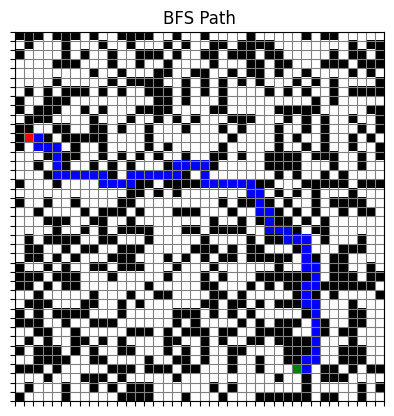

No path found in DFS.
No path found in UCS.
No path found in DLS.
No path found in IDS.
No path found in GBFS.
No path found in A*.


In [141]:
size = 40
maze, start, goal = generate_maze(size)

bfs_path = bfs(maze, start, goal)
dfs_path = dfs(maze, start, goal)
ucs_path = ucs(maze, start, goal)
dls_path = dls(maze, start, goal,depth_limit=2)
ids_path = ids(maze, start, goal,max_depth=2)
gbfs_path = gbfs(maze, start, goal)
a_star_path = a_star(maze, start, goal)
if bfs_path:
    print(f"Path found in BFS: {bfs_path}")
    visualize_maze_with_path(maze, start, goal, bfs_path, "BFS Path")
else:
    print("No path found in BFS.")

if dfs_path:
    print(f"Path found in DFS: {dfs_path}")
    visualize_maze_with_path(maze, start, goal, dfs_path, "DFS Path")
else:
    print("No path found in DFS.")
if ucs_path:
    print(f"Path found in UCS: {ucs_path}")
    visualize_maze_with_path(maze, start, goal, bfs_path, "UCS Path")
else:
    print("No path found in UCS.")
if dls_path:
    print(f"Path found in BFS: {dls_path}")
    visualize_maze_with_path(maze, start, goal, bfs_path, "DLS Path")
else:
    print("No path found in DLS.")
if ids_path:
    print(f"Path found in BFS: {ids_path}")
    visualize_maze_with_path(maze, start, goal, bfs_path, "IDS Path")
else:
    print("No path found in IDS.")
if gbfs_path:
    print(f"Path found in BFS: {gbfs_path}")
    visualize_maze_with_path(maze, start, goal, bfs_path, "GBFS Path")
else:
    print("No path found in GBFS.")
if a_star_path:
    print(f"Path found in BFS: {a_star_path}")
    visualize_maze_with_path(maze, start, goal, bfs_path, "A* Path")
else:
    print("No path found in A*.")